# Import modules

In [53]:
import pandas as pd
from fileinput import *
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [112]:
url = "https://drive.google.com/file/d/1qzzYxzrA_GjQQ_wyMM4C0pMN294oGe9M/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = df = pd.read_csv(path, encoding='ISO-8859-1')
#df = pd.read_csv(inputfile, engine = 'python')
data

,Unnamed: 0,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,1,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,3,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,...,1,1,0,0,0,0,0,1,1,0
4,5,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,0,4.624299,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,0,1.733333,1.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4595,4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,0,1.888889,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4596,4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,0,2.090909,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4597,4598,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,0,2.000000,2.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [114]:
data.name.nunique()

4596

DATA Cleaning Exploration 

In [6]:
data.describe().style.background_gradient(cmap='YlOrRd')

In [94]:
data_select = data[['hotel_url', 'name', 'views', 'views_binary', 'score_adjusted', 'bubble_rating', 'category_hotel', 'category_inn', 'category_specialty', 'class_4_5', 'class_3_4_5', 'n_reviews', 'location_grade', 'location_grade', 'discount', 'discount_perc', 'price_curr_min', 'price_min','price_max', 'award_travellers_choice' ]]
#data_select = data[['views', 'views_binary', 'score_adjusted', 'bubble_rating', 'category_hotel', 'category_inn', 'category_specialty', 'class_4_5', 'class_3_4_5', 
#            'n_reviews', 'discount', 'discount_perc', 'price_curr_min', 'price_min','price_max','amenities_24-hour check-in', 'amenities_ATM on site', 
#            'amenities_Bar / lounge','amenities_BBQ facilities', 'amenities_Bottled water', 'amenities_Breakfast available', 
#            'amenities_Children Activities (Kid / Family Friendly)',
#            'amenities_Complimentary toiletries', 'amenities_Concierge', 'amenities_Dry cleaning', 'amenities_Flatscreen TV', 'amenities_Free breakfast', 
#           'amenities_Free High Speed Internet (WiFi)', 'amenities_Housekeeping', 'amenities_Laundry service',
#            'amenities_Minibar', 'amenities_Non-smoking hotel', 'amenities_Parking', 'amenities_Pets Allowed ( Dog / Pet Friendly )', 
#            'amenities_Private check-in / check-out', 'amenities_Public wifi', 'amenities_Refrigerator', 'amenities_Room service', 'amenities_Safe', 
#            'amenities_Shared lounge / TV area', 'amenities_Shuttle bus service', 'amenities_Suites']]

In [56]:
data_select.sample(20)

,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,n_reviews,location_grade,location_grade,discount,discount_perc,price_curr_min,price_min,price_max,award_travellers_choice
4383,https://www.tripadvisor.com/Hotel_Review-g1877...,Soggiorno Il Girasole,0,0,3.000000,3.0,1,0,0,0,0,1,100.0,100.0,0,0.000000,NaN,NaN,NaN,0
4565,https://www.tripadvisor.com/Hotel_Review-g1877...,Pitagora House,0,0,3.529412,3.5,0,1,0,0,0,34,100.0,100.0,0,0.000000,NaN,3475.0,13774.0,0
1978,https://www.tripadvisor.com/Hotel_Review-g1877...,Zaccardi,0,0,4.200000,4.0,0,1,0,0,0,50,66.0,66.0,0,0.000000,3553.0,4867.0,8197.0,0
221,https://www.tripadvisor.com/Hotel_Review-g1877...,Splendor Suite Rome,0,0,4.572993,4.5,0,1,0,0,0,548,100.0,100.0,1,18.794326,4580.0,5891.0,16201.0,0
315,https://www.tripadvisor.com/Hotel_Review-g1877...,Archi di Roma Guest House,0,0,4.918367,5.0,0,1,0,0,0,49,100.0,100.0,0,0.000000,NaN,5679.0,10017.0,0
846,https://www.tripadvisor.com/Hotel_Review-g1877...,B&B GinEster,0,0,4.864865,5.0,0,1,0,0,0,111,87.0,87.0,0,0.000000,4074.0,4608.0,7552.0,0
4592,https://www.tripadvisor.com/Hotel_Review-g1877...,Lam Guest House,0,0,2.613636,2.5,0,1,0,0,0,132,100.0,100.0,0,0.000000,NaN,3970.0,6532.0,0
280,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Western Globus Hotel,4,1,3.956005,4.0,1,0,0,0,1,1682,92.0,92.0,0,0.000000,3753.0,4762.0,11618.0,0
479,https://www.tripadvisor.com/Hotel_Review-g1877...,Colors Hotel,0,0,3.911977,4.0,1,0,0,0,0,693,100.0,100.0,1,24.991418,2185.0,2690.0,9798.0,0
4443,https://www.tripadvisor.com/Hotel_Review-g1877...,Rome Napoleone Rooms,0,0,2.500000,2.5,0,1,0,0,0,2,100.0,100.0,0,0.000000,NaN,NaN,NaN,0


In [95]:
data_select['price_min'] = data_select['price_min'].div(100)

/var/folders/9x/c5p_tzmj5kv8ck2lsd46c6x40000gn/T/ipykernel_18431/998605620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select['price_min'] = data_select['price_min'].div(100)


In [96]:
data_select['price_curr_min'] = data_select['price_curr_min'].div(100)

/var/folders/9x/c5p_tzmj5kv8ck2lsd46c6x40000gn/T/ipykernel_18431/2581306446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select['price_curr_min'] = data_select['price_curr_min'].div(100)


In [97]:
data_select['price_max'] = data_select['price_max'].div(100)

/var/folders/9x/c5p_tzmj5kv8ck2lsd46c6x40000gn/T/ipykernel_18431/2483436045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select['price_max'] = data_select['price_max'].div(100)


In [119]:
data_select.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel_url                4599 non-null   object 
 1   name                     4599 non-null   object 
 2   views                    4599 non-null   int64  
 3   views_binary             4599 non-null   int64  
 4   score_adjusted           4599 non-null   float64
 5   bubble_rating            4599 non-null   float64
 6   category_hotel           4599 non-null   int64  
 7   category_inn             4599 non-null   int64  
 8   category_specialty       4599 non-null   int64  
 9   class_4_5                4599 non-null   int64  
 10  class_3_4_5              4599 non-null   int64  
 11  n_reviews                4599 non-null   int64  
 12  location_grade           4381 non-null   float64
 13  location_grade           4381 non-null   float64
 14  discount                

In [61]:
#data_select.dropna(how='all')

,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,n_reviews,location_grade,location_grade,discount,discount_perc,price_curr_min,price_min,price_max,award_travellers_choice
0,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,0,1,154,100.0,100.0,0,0.000000,55.78,55.02,138.19,0
1,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,1,1,8286,100.0,100.0,1,9.280695,87.78,109.49,279.46,1
2,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,1,1,4389,51.0,51.0,1,25.000000,67.68,83.81,143.30,0
3,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,1,1,4987,100.0,100.0,0,0.000000,75.81,77.03,183.97,0
4,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,0,4.624299,4.5,1,0,0,0,1,1068,100.0,100.0,0,0.000000,47.99,46.06,163.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,0,1.733333,1.5,1,0,0,1,1,15,96.0,96.0,0,0.000000,NaN,72.36,178.02,0
4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,0,1.888889,2.0,0,0,1,0,0,9,100.0,100.0,0,0.000000,NaN,27.54,58.27,0
4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,0,2.090909,2.0,0,0,1,0,0,11,100.0,100.0,0,0.000000,NaN,NaN,NaN,0
4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,0,2.000000,2.0,1,0,0,0,0,98,100.0,100.0,0,0.000000,NaN,NaN,NaN,0


In [62]:
#data_select['bubble_rating'] = data_select['bubble_rating'].astype(str)  #data_select.to_object(columns = ['bubble_rating'])    #data_select['bubble_rating'].astype(str)

/var/folders/9x/c5p_tzmj5kv8ck2lsd46c6x40000gn/T/ipykernel_18431/4161024166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select['bubble_rating'] = data_select['bubble_rating'].astype(str)  #data_select.to_object(columns = ['bubble_rating'])    #data_select['bubble_rating'].astype(str)


## CORRELATION

In [99]:
numerical_data = data_select.drop(columns=['hotel_url', 'name'])

In [100]:
for col in data_select.columns.values:
    print(col,'\t',data_select[col].nunique())

hotel_url 	 4599
name 	 4596
views 	 25
views_binary 	 2
score_adjusted 	 2393
bubble_rating 	 9
category_hotel 	 2
category_inn 	 2
category_specialty 	 2
class_4_5 	 2
class_3_4_5 	 2
n_reviews 	 755
location_grade 	 location_grade    65
location_grade    65
dtype: int64
location_grade 	 location_grade    65
location_grade    65
dtype: int64
discount 	 2
discount_perc 	 593
price_curr_min 	 1238
price_min 	 887
price_max 	 1608
award_travellers_choice 	 2


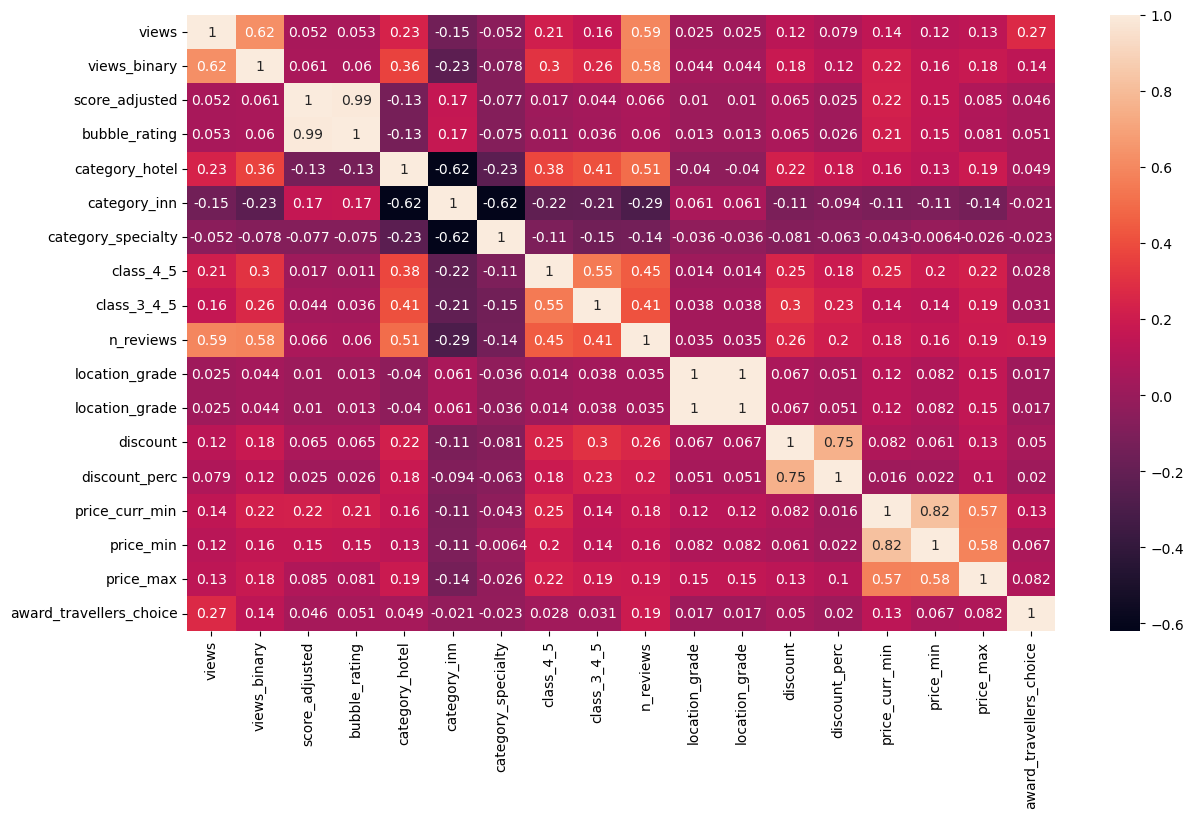

In [101]:
plt.figure(figsize=(14,8))
sns.heatmap(numerical_data.corr(),annot=True);

In [102]:
data_relevant = data_select.drop(columns=['views_binary', 'score_adjusted', 'discount', 'price_curr_min'])
data_relevant

,hotel_url,name,views,bubble_rating,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,n_reviews,location_grade,location_grade,discount_perc,price_min,price_max,award_travellers_choice
0,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,4.5,0,1,0,0,1,154,100.0,100.0,0.000000,55.02,138.19,0
1,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,5.0,1,0,0,1,1,8286,100.0,100.0,9.280695,109.49,279.46,1
2,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,4.5,1,0,0,1,1,4389,51.0,51.0,25.000000,83.81,143.30,0
3,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,4.5,1,0,0,1,1,4987,100.0,100.0,0.000000,77.03,183.97,0
4,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,4.5,1,0,0,0,1,1068,100.0,100.0,0.000000,46.06,163.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,1.5,1,0,0,1,1,15,96.0,96.0,0.000000,72.36,178.02,0
4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,2.0,0,0,1,0,0,9,100.0,100.0,0.000000,27.54,58.27,0
4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,2.0,0,0,1,0,0,11,100.0,100.0,0.000000,NaN,NaN,0
4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,2.0,1,0,0,0,0,98,100.0,100.0,0.000000,NaN,NaN,0


In [105]:
data_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel_url                4599 non-null   object 
 1   name                     4599 non-null   object 
 2   views                    4599 non-null   int64  
 3   bubble_rating            4599 non-null   float64
 4   category_hotel           4599 non-null   int64  
 5   category_inn             4599 non-null   int64  
 6   category_specialty       4599 non-null   int64  
 7   class_4_5                4599 non-null   int64  
 8   class_3_4_5              4599 non-null   int64  
 9   n_reviews                4599 non-null   int64  
 10  location_grade           4381 non-null   float64
 11  location_grade           4381 non-null   float64
 12  discount_perc            4599 non-null   float64
 13  price_min                3474 non-null   float64
 14  price_max               

#PRICES BY RATING 

In [103]:
rating_prices = data_relevant.groupby('bubble_rating')[['price_min','price_max', 'discount_perc']].mean()
rating_prices

,price_min,price_max,discount_perc
bubble_rating,,,
1.0,42.378437,110.834375,0.000000
1.5,37.995625,83.366875,1.037107
2.0,38.080182,105.111273,0.368356
2.5,39.069381,118.192165,1.360092
3.0,39.752857,101.851282,1.504586
3.5,41.285714,109.535974,2.780970
4.0,48.038685,126.379315,2.160484
4.5,54.593425,136.769500,2.473433
5.0,58.209250,132.234738,1.367760


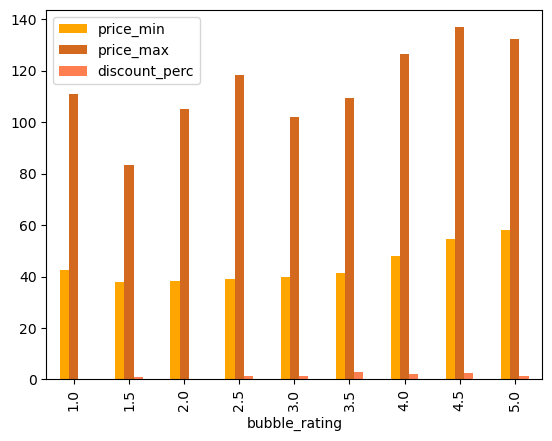

In [104]:
rating_prices.plot.bar(color=["orange", "chocolate", "coral"]);

In [88]:
rating_discount = data_relevant.groupby('bubble_rating')['discount_perc'].mean()
rating_discount

bubble_rating
1.0    0.000000
1.5    1.037107
2.0    0.368356
2.5    1.360092
3.0    1.504586
3.5    2.780970
4.0    2.160484
4.5    2.473433
5.0    1.367760
Name: discount_perc, dtype: float64

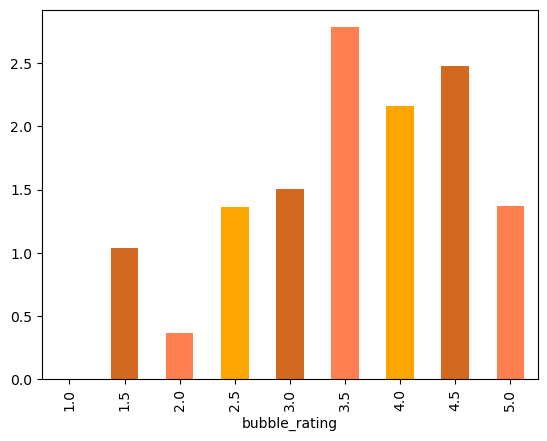

In [89]:
rating_discount.plot.bar(color=["orange", "chocolate", "coral"]);

# DESCRIBE relationship between price, discount and rating 

In [92]:
top_100_views['bubble_rating']#.astype(int)

1       5.0
11      4.5
7       4.5
48      4.0
2       4.5
       ... 
322     4.5
332     4.0
364     5.0
2221    3.5
53      5.0
Name: bubble_rating, Length: 100, dtype: object

In [140]:
top_100_views = data_relevant.nlargest(4596, 'views')  # Replace 'views' with the criteria you want to use
top_50_rating = top_100_views.loc[top_100_views['bubble_rating'] == 5.0]
top_50_rating.groupby('bubble_rating')['price_min', 'price_max'].mean()

/var/folders/9x/c5p_tzmj5kv8ck2lsd46c6x40000gn/T/ipykernel_18431/3910012904.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_50_rating.groupby('bubble_rating')['price_min', 'price_max'].mean()


,price_min,price_max
bubble_rating,,
5.0,58.20925,132.234738


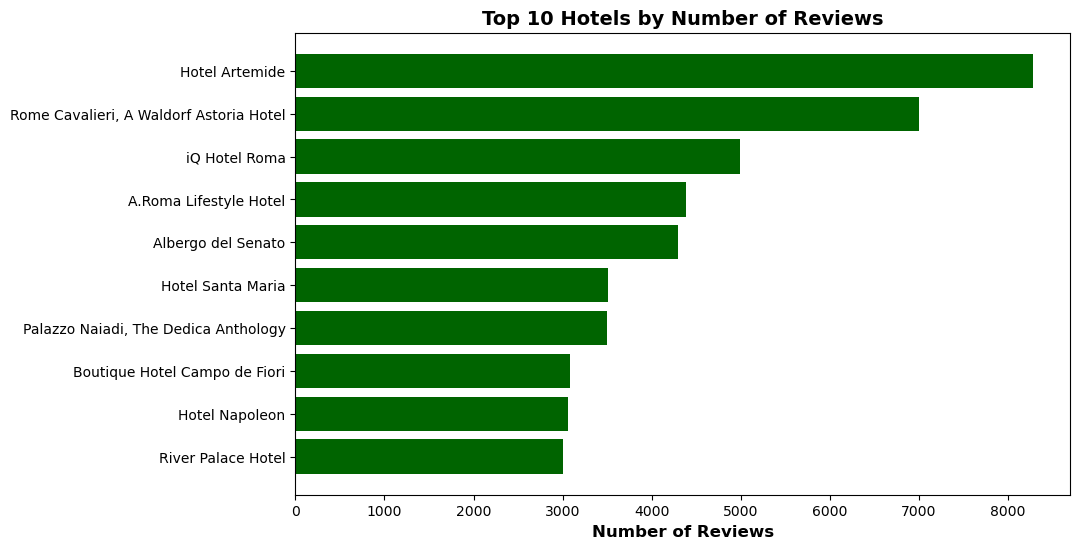

In [110]:
top_100_views = data_relevant.nlargest(100, 'views')  # Replace 'views' with the criteria you want to use
top_50_rating = top_100_views.loc[top_100_views['bubble_rating'] >= 4.5]
top_10_n_reviews = top_50_rating.nlargest(50, 'n_reviews').head(10)
top_10_n_reviews.sort_values(by='n_reviews', ascending=False, na_position='first')


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_n_reviews['name'], top_10_n_reviews['n_reviews'], color='darkgreen')  #tan
plt.xlabel('Number of Reviews', fontsize=12, fontweight='bold', color='black') #saddlebrown
plt.title('Top 10 Hotels by Number of Reviews', fontsize=14, fontweight='bold', color='black')  #saddlebrown
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('Top 10 Hotels by Number of Reviews.png')
plt.show()

In [292]:
top_10_n_reviews[['price_min','price_max', 'discount_perc']].mean()

price_min        100.631000
price_max        258.870000
discount_perc      4.851803
dtype: float64

In [293]:
top_10_rating_prices = top_10_n_reviews.groupby('bubble_rating')[['price_min','price_max', 'discount_perc']].mean()
top_10_rating_prices

,price_min,price_max,discount_perc
bubble_rating,,,
4.0,76.695,156.305000,4.613069
4.5,116.176,303.986000,6.002240
5.0,90.680,252.053333,3.093565


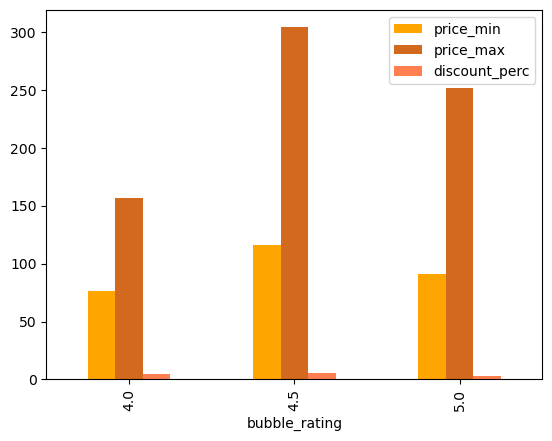

In [126]:
top_10_rating_prices.plot.bar(color=["orange", "chocolate", "coral"]);

In [294]:
top_10_rating_disc = top_10_n_reviews.groupby('bubble_rating')['discount_perc'].mean()
top_10_rating_disc

bubble_rating
4.0    4.613069
4.5    6.002240
5.0    3.093565
Name: discount_perc, dtype: float64

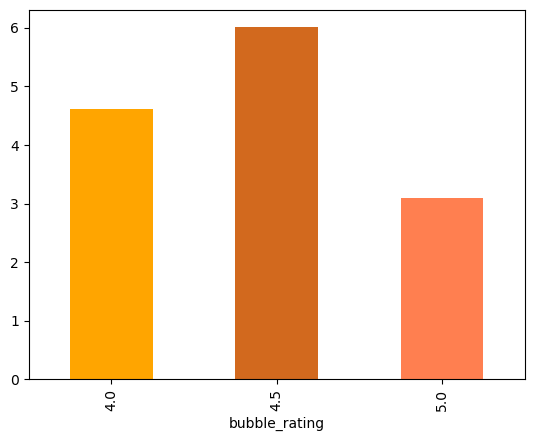

In [128]:
top_10_rating_disc.plot.bar(color=["orange", "chocolate", "coral"]);

In [303]:
data_relevant

,hotel_url,name,views,bubble_rating,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,n_reviews,location_grade,location_grade,discount_perc,price_min,price_max,award_travellers_choice
0,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,4.5,0,1,0,0,1,154,100.0,100.0,0.000000,55.02,138.19,0
1,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,5.0,1,0,0,1,1,8286,100.0,100.0,9.280695,109.49,279.46,1
2,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,4.5,1,0,0,1,1,4389,51.0,51.0,25.000000,83.81,143.30,0
3,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,4.5,1,0,0,1,1,4987,100.0,100.0,0.000000,77.03,183.97,0
4,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,4.5,1,0,0,0,1,1068,100.0,100.0,0.000000,46.06,163.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,1.5,1,0,0,1,1,15,96.0,96.0,0.000000,72.36,178.02,0
4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,2.0,0,0,1,0,0,9,100.0,100.0,0.000000,27.54,58.27,0
4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,2.0,0,0,1,0,0,11,100.0,100.0,0.000000,NaN,NaN,0
4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,2.0,1,0,0,0,0,98,100.0,100.0,0.000000,NaN,NaN,0


In [306]:
#data_relevant.drop(data_relevant.iloc[:, 10], inplace=True, axis=1)  #df.drop(df.iloc[:, 1:3], inplace=True, axis=1)  #data_relevant.iloc[0, 10]

In [307]:
data_relevant = data_relevant.drop(data_relevant.loc[:, 'location_grade'].columns, axis=1)   #data_relevant = data_relevant.drop(columns = ['location_grade'])

In [309]:
data_relevant

,hotel_url,name,views,bubble_rating,category_hotel,category_inn,category_specialty,class_4_5,class_3_4_5,n_reviews,discount_perc,price_min,price_max,award_travellers_choice
0,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,4.5,0,1,0,0,1,154,0.000000,55.02,138.19,0
1,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,5.0,1,0,0,1,1,8286,9.280695,109.49,279.46,1
2,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,4.5,1,0,0,1,1,4389,25.000000,83.81,143.30,0
3,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,4.5,1,0,0,1,1,4987,0.000000,77.03,183.97,0
4,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,4.5,1,0,0,0,1,1068,0.000000,46.06,163.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,https://www.tripadvisor.com/Hotel_Review-g1877...,Residence Libetta,0,1.5,1,0,0,1,1,15,0.000000,72.36,178.02,0
4595,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Divine Rome,0,2.0,0,0,1,0,0,9,0.000000,27.54,58.27,0
4596,https://www.tripadvisor.com/Hotel_Review-g1877...,Best Location in Rome,0,2.0,0,0,1,0,0,11,0.000000,NaN,NaN,0
4597,https://www.tripadvisor.com/Hotel_Review-g1877...,Albatros Vittoria Vaticano,0,2.0,1,0,0,0,0,98,0.000000,NaN,NaN,0
